<a href="https://colab.research.google.com/github/J1116/physics/blob/main/Fringe_Removal_Detail_in_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fringe Removal

When analyzing imaging, noise such as stripes can cause the SNR to drop. To reduce the effect of this noise, an algorithm is performed to select the most suitable reference image for the image to be analyzed.

## Algorithm

When analyzing imaging, the OD and precession (modified rotation angle) of atoms are estimated by dividing the sample image, which shows atoms, by the reference image, which does not show atoms, to calculate the contrast image. If the sample and reference images have the same interference pattern and their positions are exactly the same, no stripes are expected to appear in the contrast image. On the other hand, if the images have the same interference pattern but their positions do not overlap well, then stripes will appear, so it is important to select a reference image suitable for each sample.

### Basic notion

The basic method is to create a suitable reference image by adding the prepared reference images with appropriate weights. Here, assuming that the shape and position of the interference pattern are the same in all areas other than the atoms and the same in some areas of the atoms, the appropriate image is defined as the image for which the sum of squares of the differences in the areas other than the atoms is the lowest.
$$
\tilde{I}_i^w(x,y) = m_{x,y} I_i^w(x,y)
$$
$$
\tilde{I}_i^{wo}(x,y) = m_{x,y} I_i^{wo}(x,y)
$$

When I denote $\tilde{I}_i^{wo.c}$ by 
$$
\tilde{I}_i^{wo.c} = \sum_j \beta_{i,j} \tilde{I}_j^{wo}
$$
such that $\sum_{x,y}(\tilde{I}_i^w(x,y) - \tilde{I}_i^{wo.c}(x,y))^2$ is the smallest, my objective is calculate $\beta_{i,j}$.

Where $I_i^w(x,y)$ is the sample image, $I_i^{wo}(x,y)$ is the reference image, and $m_{x,y}$ is a function such that $m_{x,y} = 0$ at atomic positions and $m_{x,y} = 1$ at non-atomic positions.

### method

For such $\beta_{i,j}$, $\tilde{I}_i^w(x,y)\simeq \sum_j \beta_{i,j} \tilde{I}_j^{wo}(x,y)$ is expected, but the space expanded with $\tilde{I}_j^{wo}$ as a basis Since it is not complete in most cases, it is possible that $\tilde{I}_i^w(x,y)$ cannot be represented as a turn on the space at all. ($\sum_{x,y}(\tilde{I}_i^w(x,y) - \tilde{I}_i^{wo.c}(x,y))^2$ is not small.)

To prevent this situation, a new image is created from the original REFERENCE image. Specifically, for a certain integer $d$, images that are shifted from the reference image vertically and horizontally by $-d,-d+1,\cdots ,d$ respectively are also treated as reference images. This increases the number of reference images to $n \times (2d+1)^2$, which increases the coverage of the basis and improves the ability to correct interference patterns that are merely shifted in position.
Let $n$ be the number of original reference images. The number of d required (number of bases required) can be analyzed by PCA (Principal Component Analysis) or other methods.

We will consider how to calculate the weights $\{\tilde{I}^{wo}\}$ for the new set of increased bases as $\beta_{i,j}$. The autocorrelation matrix (covariance matrix) of this set is
$$
C_{j,k} = \sum_{x,y} \tilde{I}_j^{wo}(x,y) \tilde{I}_k^{wo}(x,y)
$$
projection matrix of $\tilde{I}_i^w$ is
$$
P_{i,k} = \sum_{x,y} \tilde{I}_i^w(x,y) \tilde{I}_k^{wo}(x,y)
$$
We assume $\tilde{I}_i^w(x,y) \simeq \sum_j \beta_{i,j} \tilde{I}_j^{wo}(x,y)$,
$$
P_{i,k} \simeq \sum_j \sum_{x,y} \beta_{i,j} \tilde{I}_j^{wo}(x,y) \tilde{I}_k^{wo}(x,y)
$$
$$
= \sum_j \beta_{i,j} C_{j,k}
$$
Thus
$$
P = \beta \cdot C
$$
If we can solve the matrix equation $\tilde{I}_i^w$, we can determine $\beta$ that can represent $\tilde{I}_i^w$ completely. However, as mentioned at the beginning, $\{\tilde{I}^{wo}\}$ is rarely complete, so let us assume that $C$ is not regular (full rank). In this case, there is no solution to the equation, so we will look for a solution as close as possible. Specifically, among the least-squares points of possible solutions that exist, the one with the smallest defined norm (in this case $L2$-norm).

First, let $C$ factorize two full-rank matrices $A,B$.
$$
C = AB
$$
At this time, $\beta$ such that the above conditions are satisfied is
$$
\beta = PC^-
$$
where
$$
C^- = B^T(BB^T)^{-1}(A^TA)^{-1}A^T
$$

The factorization into two full-rank matrices can be easily computed using singular value decomposition: let C be a matrix such that $n \times n$ and $rank(C)=r$.
$$
C = U \Sigma V^T
$$
$$
= U_r \Sigma_r V_r^T
$$
$$
=AB
$$
where $A = U_r \in R^{n \times r},B = \Sigma_r V_r^T \in R^{r \times n}$ is full-rank matrices, $U,V \in R^{n \times n}$ is the unitary matrix, $\Sigma \in R^{n \times n}$ is the singular value matrix, $U_r \in R^{n \times r}$ is the matrix taken up to $r$ rows of $U$, $V_r \in R^{r \times n}$ is the matrix taken up to $r$ columns of $V$, $\Sigma_r \in R^{r \times r}$ is the matrix taken up to $r$ rows and $r$ columns of $\Sigma$.

Therefore
$$
C^- = V_r \Sigma_r (\Sigma_r V_r^T V_r \Sigma_r)^{-1} (U_r^T U_r)^{-1} U_r^T
$$
$$
= V_r \Sigma_r^{-1} U_r^T
$$
In this way $\beta$ is calculated and the appropriate reference is made.

## preparation

If you use google colaboratory and google drive, run this cell

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


I have created a folder called 'Colab Notebooks' in google drive, so move the directory

In [ ]:
cd drive/My Drive/'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


Install spe2py, a module for reading spe files, in colab (if you want to run it with jupyter, you can install it on your computer beforehand).

In [ ]:
!pip install spe2py

  Created wheel for untangle: filename=untangle-1.1.1-cp37-none-any.whl size=3412 sha256=13e41efcce29dfeae2716c824823314748d950562fa51a01ade572a7437977d0
  Stored in directory: /root/.cache/pip/wheels/16/18/ff/b217dc66c822e07c274599310ba25ffce62cda02fc1c0bdca2
Successfully built untangle


Import of required library

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import spe2py as spe
import spe_loader as sl
import plotly.graph_objects as go

## analyse absorption imaging

The first step is to analyze absorption imaging.

### load image

The 50 images with the same conditions are lined up in multiples of 7 from 353 and are successfully imported. see [official page](https://pypi.org/project/spe2py/) for more information on how to use spe2py.

In [ ]:
filenum_sam = 50 #file number
image_sam = np.zeros((filenum_sam,2,1,512,1024))

for i in range(50):
  image_sam[i] = np.array(sl.load_from_files([f'PIXIS2/PIXIS0313_  {353 + 7*i}.spe']).data)

In [ ]:
image_sam = np.squeeze(image_sam) #次元1の配列を削除

In [ ]:
image_sam.shape #配列の次元確認

(50, 2, 512, 1024)

The first element of the array represents the number of files, the second the number of frames (with and without atoms), the third the rows of images, and the fourth the columns of images.

Try to display an image

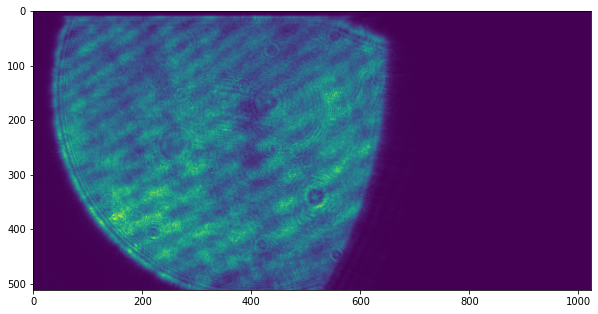

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sam[1,0,:,:].reshape(512, -1), aspect=1) #1枚目のsample(原子あり)画像
plt.show()

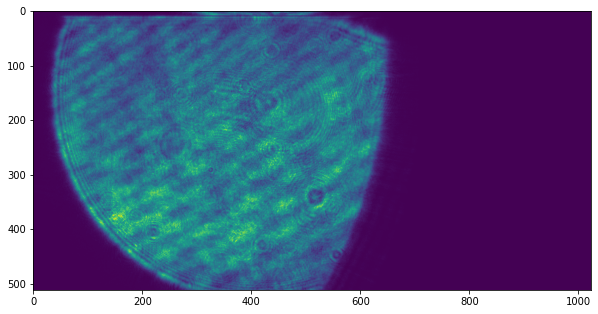

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sam[1,1,:,:].reshape(512, -1), aspect=1) #1枚目のreference(原子なし)画像
plt.show()

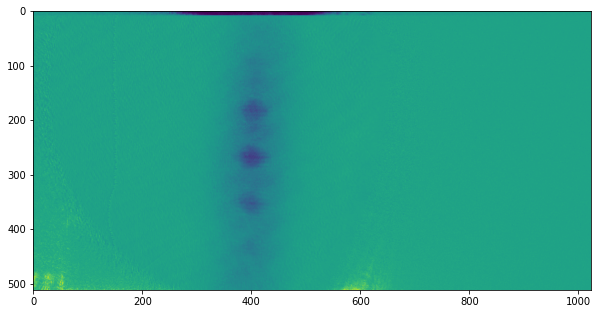

In [ ]:
frame = image_sam[1,0,:,:] / image_sam[1,1,:,:]

plt.figure(figsize=(10, 10))
plt.imshow(frame[:,:].reshape(512, -1), aspect=1) #1枚目のcontrast(sample / reference)画像
plt.show()

### image processing

The image also shows parts of the image that are not supposed to be illuminated, so crop the image well.

In [ ]:
image_sam5 = np.delete(image_sam, slice(0,200), 3) #配列の指定した要素を消去
image_sam5 = np.delete(image_sam5, slice(400,824), 3)
image_sam5 = np.delete(image_sam5, slice(0,50), 2)
image_sam5 = np.delete(image_sam5, slice(400,462), 2)

In [ ]:
image_sam5.shape

(50, 2, 400, 400)

We see that the number of pixels in the image has been reduced from $(512,1024)$ to $(400,400)$.

Next, the reference image is expanded by shifting the area to be cropped above by d. In this case, we will use $d=1$.

In [ ]:
d = 1
count = 0
image_sam2 = np.zeros((((2*d+1)**2)*image_sam.shape[0],512,1024))
image_sam3 = np.zeros((((2*d+1)**2)*image_sam.shape[0],400,400))
for j in range(-d,d+1):
  for k in range(-d,d+1):
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:824-j] = np.delete(image_sam[:,1,:,:], slice(0,200+j), 2)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:400] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:824-j], slice(400,824-j), 2)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:462-k,:] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:], slice(0,50+k), 1)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:400,:] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:462-k,:], slice(400,462-k), 1)
    image_sam3[count * filenum_sam : (count + 1) * filenum_sam] = np.delete(np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam], slice(400,1024), 2),slice(400,512), 1)
#    image_sam3[count * filenum_sam : (count + 1) * filenum_sam] = np.delete(image_sam3[count * filenum_sam : (count + 1) * filenum_sam], slice(400,512), 1)
    count += 1

In [ ]:
image_sam3.shape

(450, 400, 400)

The number of extended images is properly $50 \times (2 \times 1 + 1)^2 = 450$.

I'll check to see if I've cropped it well.

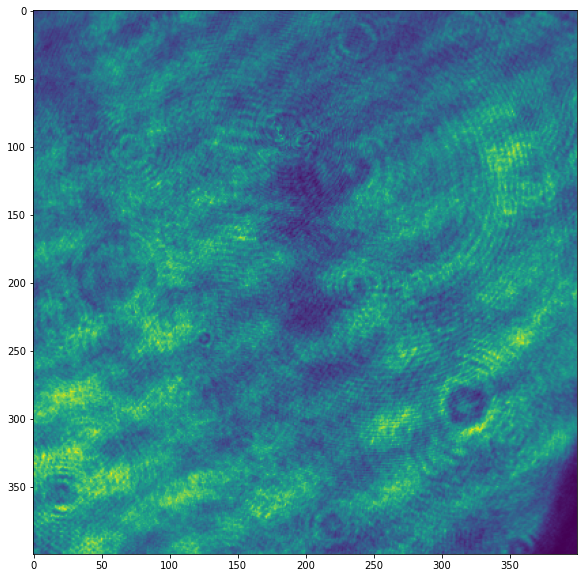

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sam5[1,0,:,:].reshape(400, -1), aspect=1)
plt.show()

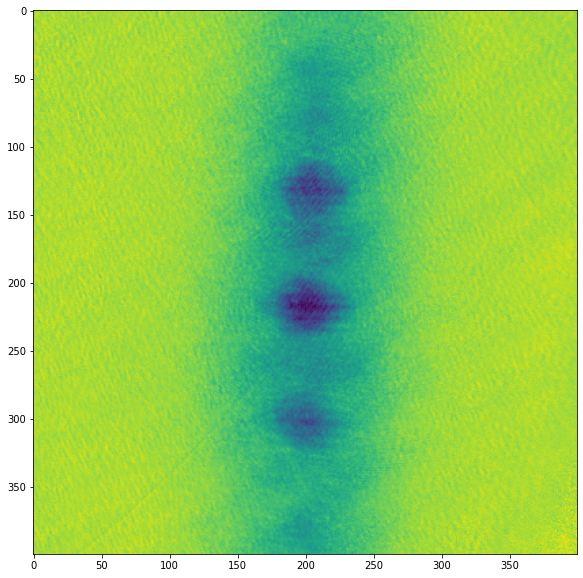

In [ ]:
frame = image_sam5[1,0,:,:] / image_sam5[1,1,:,:]

plt.figure(figsize=(10, 10))
plt.imshow(frame[:,:].reshape(400, -1), aspect=1)
plt.show()

A clean contrast is seen compared to the previous section.

The next process for calculation is to mask the atoms (trimming only the image of the atom part).

In [ ]:
image_sam_cal = np.delete(image_sam5[:,0,:,:], slice(100,300), 2) #sample画像の原子マスク
image_ref_cal = np.delete(image_sam3[:,:,:], slice(100,300), 2) #reference画像の原子マスク
image_sam_cal = np.delete(image_sam_cal, slice(300,400), 1)
image_ref_cal = np.delete(image_ref_cal, slice(300,400), 1)
image_sam_cal2 = np.delete(image_sam5[:,0,:,:], slice(100,300), 2) #image_sam_calと同じもの
image_ref_cal2 = np.delete(image_sam5[:,1,:,:], slice(100,300), 2) #d動かしていないreference画像の原子マスク
image_sam_cal2 = np.delete(image_sam_cal2, slice(300,400), 1)
image_ref_cal2 = np.delete(image_ref_cal2, slice(300,400), 1)

In [ ]:
print(image_sam_cal.shape)
print(image_ref_cal.shape)

(50, 300, 200)
(450, 300, 200)


You can see that the number of pixels in the image is reduced by the amount you erased.

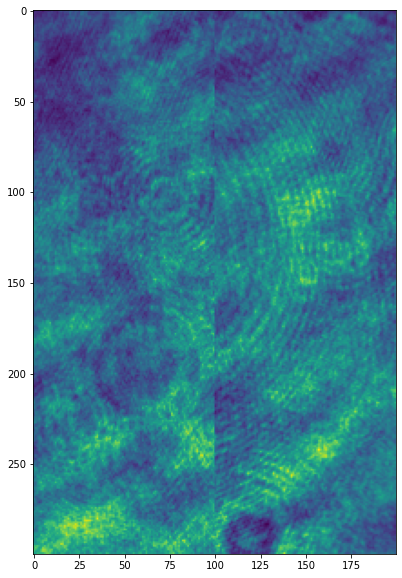

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_ref_cal[0].reshape(300, -1), aspect=1)
plt.show()

### calculation

We will calculate the weights $\beta$. First, we calculate the matrices $C$ and $P$.

In [ ]:
filenum_ref = filenum_sam * ((2*d+1)**2)
C = np.zeros((filenum_ref, filenum_ref))
P = np.zeros((filenum_sam, filenum_ref))

for j in range(filenum_ref):
  for k in range(filenum_ref):
    C[j,k] = np.sum(image_ref_cal[j] * image_ref_cal[k])

for i in range(filenum_sam):
  for k in range(filenum_ref):
    P[i,k] = np.sum(image_sam_cal[i] * image_ref_cal[k])


Next, $\beta$ is calculated. The $A^-$ is so-called Moore Penrose pseudo inverse, which is calculated by using a function in numpy. (There is also a function in numpy that does the singular value decomposition, so you can use that as well.)

Then, using beta, calculate $\tilde{I}^{wo.c}$.

In [ ]:
C_pinv = np.linalg.pinv(C) #MP擬似逆行列
beta = np.dot(P, C_pinv) #\betaの計算

image_ref_cal_cor = np.zeros((filenum_sam,image_ref_cal.shape[1],image_ref_cal.shape[2]))

for i in range(filenum_sam):
  for j in range(filenum_ref):
    image_ref_cal_cor[i,:,:] += beta[i,j] * image_ref_cal[j,:,:] #\tilde{I}^{wo.c}の計算

Now that we have an image that we think is appropriate, let's see what happens directly first.

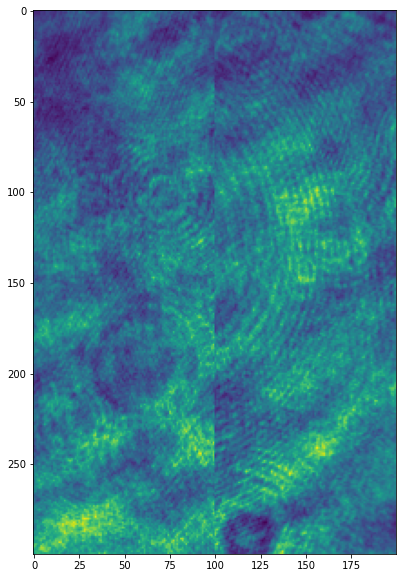

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_ref_cal_cor[0].reshape(300, -1), aspect=1) #1枚目の修正reference画像
plt.show()

Next, we will visually see how the cotrast image has changed after masking. Only the reference part of the sample / reference is changed. The left side is the image after modification and the right side is the image before modification.

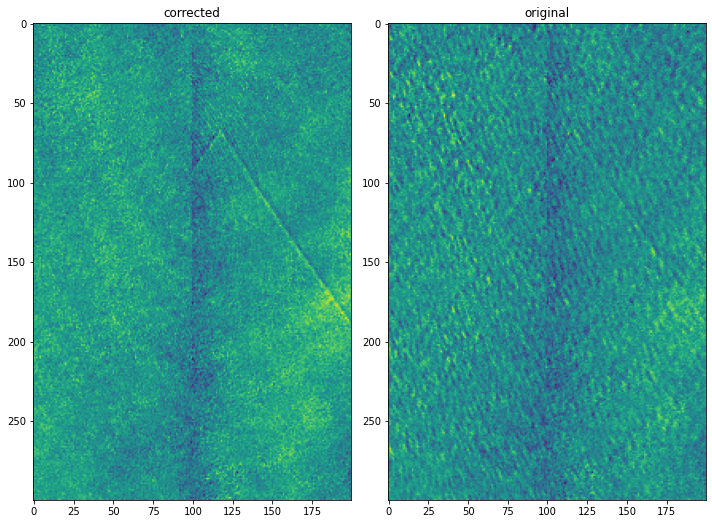

In [ ]:
rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(10, 10))
axes.append( fig.add_subplot(rows, cols, 1) )
image = image_sam_cal2[0]/image_ref_cal_cor[0]
subplot_title=("corrected")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(300, -1), aspect=1)
axes.append( fig.add_subplot(rows, cols, 2) )
image = image_sam_cal2[0]/image_ref_cal2[0]
subplot_title=("original")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(300, -1), aspect=1)
fig.tight_layout()
plt.show()

It appears to be clean. Next, let's take a visual look at the contrast when atoms are also included. What we need to do is the same as before. First, we make an appropriate reference for the unmasked case.

In [ ]:
image_ref_cor = np.zeros((filenum_sam,image_sam5.shape[2],image_sam5.shape[3]))

for i in range(filenum_sam):
  for j in range(filenum_ref):
    image_ref_cor[i,:,:] += beta[i,j] * image_sam3[j,:,:]

Next, compare the contrast using the reference created earlier. The left side is the image after the modification and the right side is the image before the modification.

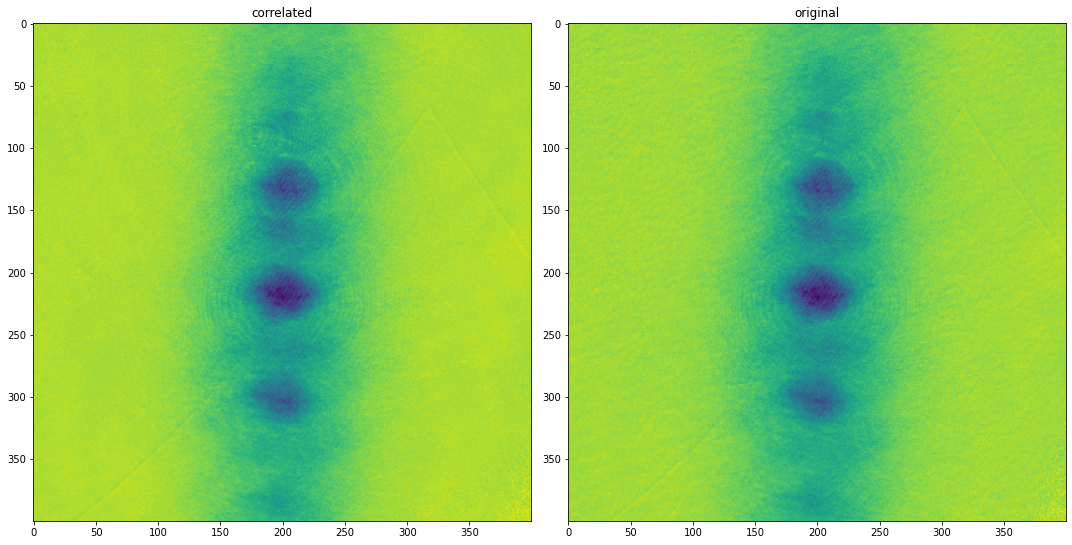

In [ ]:
rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(15, 15))
axes.append( fig.add_subplot(rows, cols, 1) )
image = image_sam5[2,0,:,:]/image_ref_cor[2]
subplot_title=("correlated")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(400, -1), aspect=1)
axes.append( fig.add_subplot(rows, cols, 2) )
image = image_sam5[2,0,:,:]/image_sam5[2,1,:,:]
subplot_title=("original")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(400, -1), aspect=1)
fig.tight_layout()    
plt.show()

If you look closely, it appears to be a little cleaner.

### analysis

Finally, we take out the standard deviation of $|$image - reference$|$ when the atoms are masked (probably because it affects the fluctuations of the atoms). First, we take the absolute value of the difference between each element of the image and sum it.

In [ ]:
image_dif_cor = np.sum(np.sum(np.abs(image_sam_cal2 - image_ref_cal_cor), axis=1),axis=1)
image_dif = np.sum(np.sum(np.abs(image_sam_cal2 - image_ref_cal2), axis=1),axis=1)

In [ ]:
image_dif_cor.shape

(50,)

I can calculate $|$image - reference$|$ for the number of images.

Next, let's look at the histogram.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=image_dif_cor, name = 'corrected'))
fig.add_trace(go.Histogram(x=image_dif, name = 'original'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Blue is after the correction and red is before the correction. it can be seen that not only the mean but also the variance has become much smaller.

Finally, the mean and standard deviation of each are calculated.

In [ ]:
image_mean = np.mean(image_dif)
image_std = np.std(image_dif)
image_mean_cor = np.mean(image_dif_cor)
image_std_cor = np.std(image_dif_cor)

print('mean(original):{:.3e}'.format(image_mean))
print('std(original):{:.3e}'.format(image_std))
print('mean(corrected):{:.3e}'.format(image_mean_cor))
print('std(corrected):{:.3e}'.format(image_std_cor))

平均値(元の画像):1.779e+07
標準偏差(元の画像):2.539e+06
平均値(修正後):1.146e+07
標準偏差(修正後):2.229e+05


It was confirmed that the value was properly lowered as a value.

## analyse phase contrast imaging

Next, phase contrast imaging (PCI) is analyzed. The procedure is almost the same as for absorption imaging.

### load image

In [ ]:
filenum_sam = 50
image_sam = np.zeros((filenum_sam,62,1,15,512))

for i in range(50):
  image_sam[i] = np.array(sl.load_from_files([f'PCI2/Data0313_  {356 + 7*i}.spe']).data)

In [ ]:
image_sam = np.squeeze(image_sam)

In [ ]:
image_sam.shape

(50, 62, 15, 512)

Display the image. In this case, there are only 15 rows, so the aspect ratio is set to 5:1 to make it easier to see.

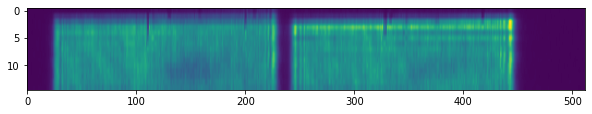

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sam[1,1,:,:].reshape(15, -1), aspect=5) #aspect ratio 5:1
plt.show()

Next, let's look at CONTRAST.

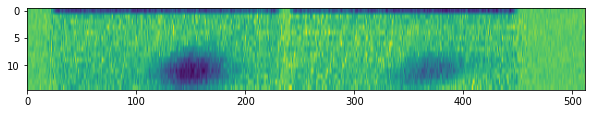

In [ ]:
frame = image_sam[1,1,:,:] / image_sam[1,-1,:,:]

plt.figure(figsize=(10, 10))
plt.imshow(frame[:,:].reshape(15, -1), aspect=5)
plt.show()

### image processing

Next, trim the excess portions as in absorption imaging.

In [ ]:
image_sam5 = np.delete(image_sam, slice(0,6), 2)
image_sam5 = np.delete(image_sam5, np.s_[-1:], 2)
image_sam5 = np.delete(image_sam5, slice(0,30), 3)
image_sam5 = np.delete(image_sam5, slice(190,220), 3)
image_sam5 = np.delete(image_sam5, np.s_[380:], 3)

In [ ]:
image_sam5.shape

(50, 62, 8, 380)

Create a d-shifted reference image.

In [ ]:
d = 1
count = 0
image_sam2 = np.zeros((((2*d+1)**2)*image_sam.shape[0],image_sam.shape[2],image_sam.shape[3]))
image_sam3 = np.zeros((((2*d+1)**2)*image_sam.shape[0],8,380))
for j in range(-d,d+1):
  for k in range(-d,d+1):
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:9-j,:] = np.delete(image_sam[:,-1,:,:], slice(0,6+j), 1)
    if not j == 1:
      image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:8,:] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:9-j,:], np.s_[-1+j:], 1)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:482-k] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:], slice(0,30+k), 2)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:452-k] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:482-k], slice(190,220), 2)
    image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:380] = np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam,:,:452-k], np.s_[380:], 2)
    image_sam3[count * filenum_sam : (count + 1) * filenum_sam] = np.delete(np.delete(image_sam2[count * filenum_sam : (count + 1) * filenum_sam], slice(8,15), 1),slice(380,512), 2)
#    image_sam3[count * filenum_sam : (count + 1) * filenum_sam] = np.delete(image_sam3[count * filenum_sam : (count + 1) * filenum_sam], slice(400,512), 1)
    count += 1

In [ ]:
image_sam3.shape

(450, 8, 380)

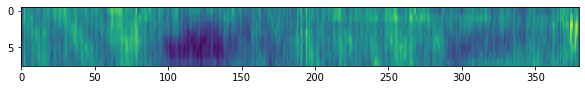

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_sam5[1,1,:,:].reshape(8, -1), aspect=5)
plt.show()

PCI has a total of 61 sample images (the first image is not available, so there are actually 60 images), but for now, we will analyze the second image.

In [ ]:
image_sam_cal = np.delete(image_sam5[:,1,:,:], slice(60,170), 2) #2枚目の画像
image_ref_cal = np.delete(image_sam3, slice(60,170), 2)
image_sam_cal = np.delete(image_sam_cal, slice(140,250), 2)
image_ref_cal = np.delete(image_ref_cal, slice(140,250), 2)
image_sam_cal2 = np.delete(image_sam5[:,1,:,:], slice(60,170), 2)
image_ref_cal2 = np.delete(image_sam5[:,-1,:,:], slice(60,170), 2)
image_sam_cal2 = np.delete(image_sam_cal2, slice(140,250), 2)
image_ref_cal2 = np.delete(image_ref_cal2, slice(140,250), 2)

In [ ]:
print(image_sam_cal.shape)
print(image_ref_cal.shape)

(50, 8, 160)
(450, 8, 160)


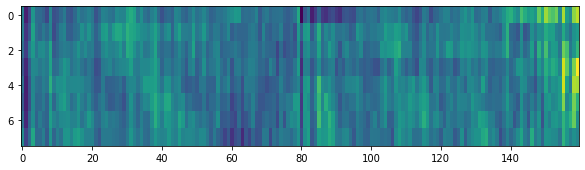

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_ref_cal[0].reshape(8, -1), aspect=5)
plt.show()

### calculation

Calculate in the same way. The flow from here is almost the same as absorption imaging.

In [ ]:
filenum_ref = filenum_sam * ((2*d+1)**2)
C = np.zeros((filenum_ref, filenum_ref))
P = np.zeros((filenum_sam, filenum_ref))

for j in range(filenum_ref):
  for k in range(filenum_ref):
    C[j,k] = np.sum(image_ref_cal[j] * image_ref_cal[k])

for i in range(filenum_sam):
  for k in range(filenum_ref):
    P[i,k] = np.sum(image_sam_cal[i] * image_ref_cal[k])


In [ ]:
C_pinv = np.linalg.pinv(C)
beta = np.dot(P, C_pinv)

image_ref_cal_cor = np.zeros((filenum_sam,image_ref_cal.shape[1],image_ref_cal.shape[2]))

for i in range(filenum_sam):
  for j in range(filenum_ref):
    image_ref_cal_cor[i,:,:] += beta[i,j] * image_ref_cal[j,:,:]

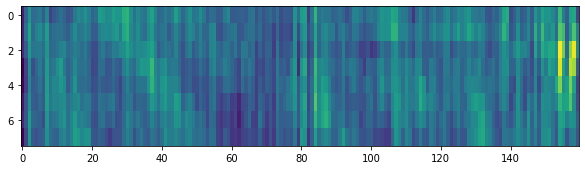

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_ref_cal_cor[0].reshape(8, -1), aspect=5)
plt.show()

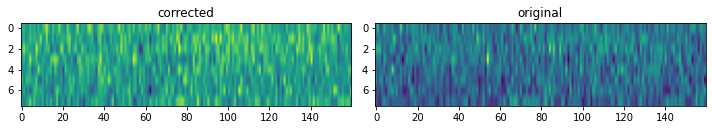

In [ ]:
rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(10, 10))
axes.append( fig.add_subplot(rows, cols, 1) )
image = image_sam_cal2[0]/image_ref_cal_cor[0]
subplot_title=("corrected")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(8, -1), aspect=5)
axes.append( fig.add_subplot(rows, cols, 2) )
image = image_sam_cal2[0]/image_ref_cal2[0]
subplot_title=("original")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(8, -1), aspect=5)
fig.tight_layout()
plt.show()

In [ ]:
image_ref_cor = np.zeros((filenum_sam,image_sam5.shape[2],image_sam5.shape[3]))

for i in range(filenum_sam):
  for j in range(filenum_ref):
    image_ref_cor[i,:,:] += beta[i,j] * image_sam3[j,:,:]

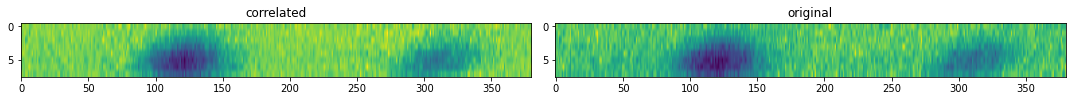

In [ ]:
rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(15, 15))
axes.append( fig.add_subplot(rows, cols, 1) )
image = image_sam5[2,1,:,:]/image_ref_cor[2]
subplot_title=("correlated")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(8, -1), aspect=5)
axes.append( fig.add_subplot(rows, cols, 2) )
image = image_sam5[2,1,:,:]/image_sam5[2,-1,:,:]
subplot_title=("original")
axes[-1].set_title(subplot_title)
plt.imshow(image.reshape(8, -1), aspect=5)
fig.tight_layout()    
plt.show()

### analysis

In [ ]:
image_dif_cor = np.sum(np.sum(np.abs(image_sam_cal2 - image_ref_cal_cor), axis=1),axis=1)
image_dif = np.sum(np.sum(np.abs(image_sam_cal2 - image_ref_cal2), axis=1),axis=1)

In [ ]:
image_dif_cor.shape

(50,)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=image_dif_cor, name = 'corrected'))
fig.add_trace(go.Histogram(x=image_dif, name = 'original'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
image_mean = np.mean(image_dif)
image_std = np.std(image_dif)
image_mean_cor = np.mean(image_dif_cor)
image_std_cor = np.std(image_dif_cor)

print('mean(original):{:.3e}'.format(image_mean))
print('std(original):{:.3e}'.format(image_std))
print('mean(corrected):{:.3e}'.format(image_mean_cor))
print('std(corrected):{:.3e}'.format(image_std_cor))

平均値(元の画像):1.070e+05
標準偏差(元の画像):8.011e+03
平均値(修正後):4.742e+04
標準偏差(修正後):1.279e+03


## 参考文献

Bo Song, Chengdong He, Zejian Ren, Entong Zhao, Jeongwon Lee, and Gyu-Boong Jo
:[Effective Statistical Fringe Removal Algorithm for High-Sensitivity Imaging of Ultracold Atoms](https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.14.034006)